A reimplementation of [Tutorial on how to calculate detrended fluctuation analysis in Matlab using the Neurophysiological Biomarker Toolbox.](https://www.nbtwiki.net/doku.php?id=tutorial:detrended_fluctuation_analysis_dfa#extented_dfa_tutorial)
with Python and `fathon`.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Generate a signal in time

In [13]:
fs = 250  # sampling frequency
t_end = 300
nb_channels = 1

time = np.linspace(0, t_end, t_end * fs)
signal = np.random.randn(t_end * fs, nb_channels)  #  time along the 1st dimension, and channels along 2nd dimension

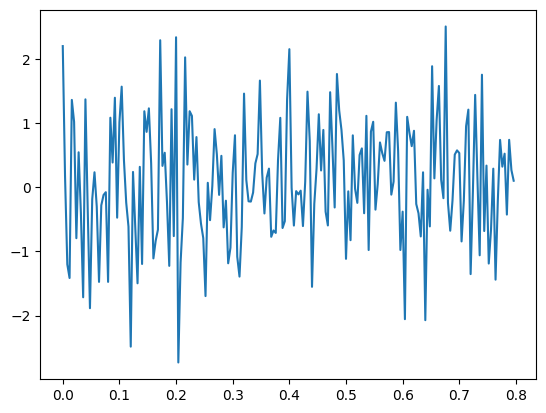

In [14]:
plot_end = 200
plt.plot(time[:plot_end], signal.flat[:plot_end])

Extract the amplitude envelope using a FIR filter and the hilbert transform. See also:

* [scipy cookbook on "FIR filter"](https://scipy-cookbook.readthedocs.io/items/FIRFilter.html), and
* [scipy cookbook on "Applying a FIR filter"](https://scipy-cookbook.readthedocs.io/items/ApplyFIRFilter.html).

In [22]:
from scipy.signal import kaiserord, firwin, lfilter, hilbert


def filter_envelope(signal, channel=0):
    """Filter and return signal envelope."""
    sig = signal[:, channel]
    
    filter_order = int(8/2)  # Filter order is 2/8 (in seconds) in the original tutorial
    cutoff = np.array([8, 13])
    taps = firwin(filter_order + 1, cutoff, pass_zero=False, fs=fs)

#     # The Nyquist rate of the signal.
#     nyq_rate = fs / 2.0
#     # The desired attenuation in the stop band, in dB.
#     ripple_db = 60.0
#     # The desired width of the transition from pass to stop,
#     # relative to the Nyquist rate.  We'll design the filter
#     # with a 5 Hz transition width.
#     width = 5.0 / nyq_rate
#     N, beta = kaiserord(ripple_db, width)
#     cutoff = np.array([8, 13])
#     # Use firwin with a Kaiser window to create a lowpass FIR filter.
#     taps = firwin(N, cutoff/nyq_rate, window=('kaiser', beta))

    # Use lfilter to filter x with the FIR filter.
    filtered_sig = lfilter(taps, [1.0], sig)

    envelope_sig = abs(hilbert(filtered_sig))
    return filtered_sig, envelope_sig

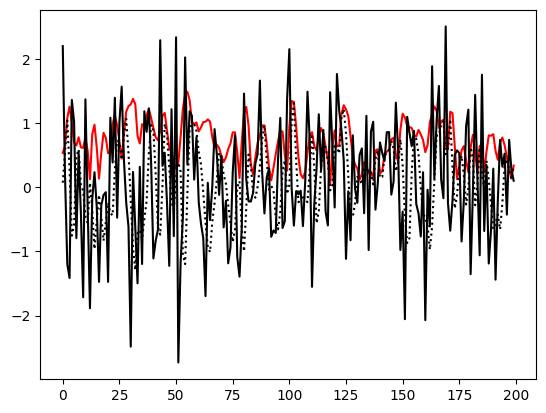

In [23]:
%matplotlib inline

filtered_sig, envelope_sig = filter_envelope(signal)

plt.plot(envelope_sig[:plot_end], 'r-')
plt.plot(filtered_sig[:plot_end], 'k:')
plt.plot(signal.flat[:plot_end], 'k-')
plt.show()

## DFA

In [24]:
from fathon import DFA

pydfa = DFA(envelope_sig)

In [25]:
nMin = 15
nMax = 25
revSeg = False
nStep = 1
polOrd = 3

In [26]:
n, F = pydfa.computeFlucVec(nMin, nMax=nMax, revSeg=revSeg, nStep=nStep, polOrd=polOrd)

In [27]:
H, H_intercept = pydfa.fitFlucVec()

Fit limits: [15, 25]
Fit result: H_intercept = -2.83, H = 0.48


Text(0.5, 1.0, 'DFA-exp=0.48')

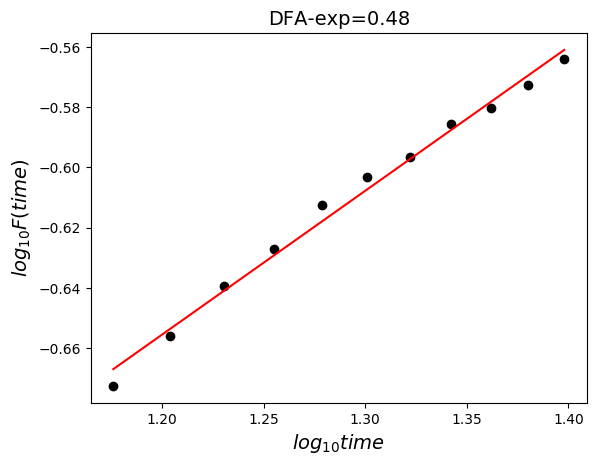

In [28]:
# base = np.e
# log = np.log
base = 10
log = np.log10

plt.plot(log(n), log(F), 'ko')
plt.plot(log(n), H_intercept * log(np.e) + H * log(n), 'r-')
plt.xlabel(f'$log_{{{base}}} time$', fontsize=14)
plt.ylabel(f'$log_{{{base}}} F(time)$', fontsize=14)
plt.title(f'DFA-exp={H:.2f}', fontsize=14)